<a href="https://colab.research.google.com/github/rmaciel-prog/JornadaPython/blob/master/Pytorch_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoca [5/60], Perdas: 0.4042
Epoca [10/60], Perdas: 0.4042
Epoca [15/60], Perdas: 0.4042
Epoca [20/60], Perdas: 0.4042
Epoca [25/60], Perdas: 0.4042
Epoca [30/60], Perdas: 0.4042
Epoca [35/60], Perdas: 0.4042
Epoca [40/60], Perdas: 0.4042
Epoca [45/60], Perdas: 0.4042
Epoca [50/60], Perdas: 0.4042
Epoca [55/60], Perdas: 0.4042
Epoca [60/60], Perdas: 0.4042


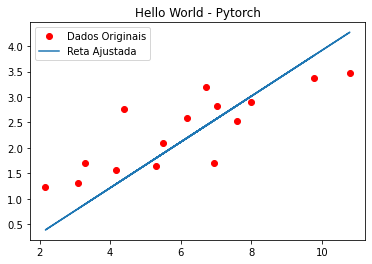

In [17]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


# Hiperparametros
tamanho_entrada = 1
tamanho_saida = 1
epocas = 60
learning_rate = 0.001

# Dados de exemplo
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# Modelo de Regressãão linear
modelo = nn.Linear(tamanho_entrada, tamanho_saida)

# Perda e otimizador
criterio = nn.MSELoss()
otimizador = torch.optim.SGD(modelo.parameters(), lr=learning_rate)  

# Treinamento do modelo
for epoca in range(epocas):
    # Converte os arrays numpy em tensores pytorch
    entradas = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Foward na rede neural
    saidas = model(entradas)
    loss = criterio(saidas, targets)
    
    # Backwards na rede neural
    otimizador.zero_grad()
    loss.backward()
    otimizador.step()
    
    if (epoca+1) % 5 == 0:
        print ('Epoca [{}/{}], Perdas: {:.4f}'.format(epoca+1, epocas, loss.item()))

# Imprime o grafico da regressão
previsto = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Dados Originais')
plt.plot(x_train, previsto, label='Reta Ajustada')
plt.title('Hello World - Pytorch')
plt.legend()
plt.show()

